# Actividades

In [1]:
#| include: false
import geopandas as gpd
import json
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Añadimos los datos de población
datos = {
    "Andalucia": 724400,
    "Aragon": 51800,
    "Asturias": 53400,
    "Baleares": 74600,
    "Canarias": 196400,
    "Cantabria": 20700,
    "Castilla-Leon": 116000,
    "Castilla-La Mancha": 126800,
    "Cataluña": 366300,
    "Valencia": 333100,
    "Extremadura": 85700,
    "Galicia": 114700,
    "Madrid": 361000,
    "Murcia": 86200,
    "Navarra": 30600,
    "Pais Vasco": 67400,
    "La Rioja": 15800,
    "Ceuta": 11000,
    "Melilla": 10300
}
df = pd.DataFrame(datos.items(), columns=['Comunidad', 'Desempleados'])

## Actividad 1: Mapa coroplético de valores absolutos

In [3]:
# Cargamos el GeoJSON
with open('spain-communities.geojson', encoding='utf-8') as f:
    data = json.load(f)

# Extraemos el nombre de la comunidad y su geometría
features = data["features"]
geo_df = gpd.GeoDataFrame([
    {"Comunidad": f["properties"]["name"], "geometry": f["geometry"]}
    for f in features
])

# Unimos DataFrame con GeoDataFrame usando 'Comunidad'
df_final = geo_df.merge(df, on="Comunidad", how="left")

geo_df = df_final.rename(columns=lambda x: x.strip())  # Eliminamos espacios y caracteres extraños

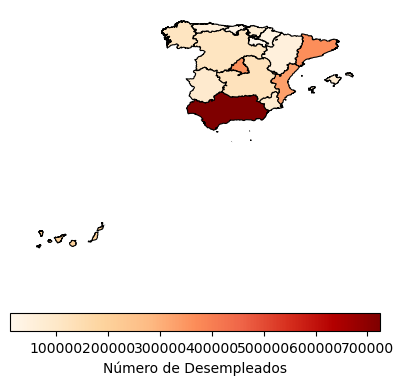

In [4]:
#| fig-align: center
#| include: true
#| width: 80%
#| fig-cap: "Desempleo por Comunidad Autónoma en España"
# Mostramos el mapa coroplético de España sin normalizar
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from shapely.geometry import shape

geo_df["geometry"] = geo_df["geometry"].apply(shape)
geo_df = geo_df.set_geometry("geometry")

# Graficar mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
geo_df.plot(column="Desempleados", cmap="OrRd", linewidth=0.8, edgecolor="black",
            legend=True, legend_kwds={'label': "Número de Desempleados",
                                      'orientation': "horizontal"}, ax=ax)

ax.axis("off")  # Ocultar ejes
plt.tight_layout()
# Mostrar mapa
plt.show()

Se puede observar claramente como la visualización está influenciada por el tamaño de la población de la propia comunidad autónoma, al final, es directamente proporcional el número de desempleados con el tamaño de la población, por tanto, las comunidades autónomas con muchos habitantes, como Andalucía, Madrid o Cataluña, tienden a mostrarse con un problema importante de desempleo cuando podría no ser así.

Como solución a esto, posteriormente normalizaremos los datos de desempleo para realizar una visualización más representativa.

In [5]:
# Datos de la población de las comunidades autónomas
poblacion_data = {
    "Comunidad Autónoma": ["Andalucia", "Aragon", "Asturias", "Baleares", "Canarias", 
                           "Cantabria", "Castilla-Leon", "Castilla-La Mancha", 
                           "Cataluña", "Valencia", "Extremadura", "Galicia", "Madrid", 
                           "Murcia", "Navarra", "Pais Vasco", "La Rioja", "Ceuta", 
                           "Melilla"],
    "Población 2024": [8500000, 1300000, 1000000, 1200000, 2200000, 600000, 2400000, 
                       2100000, 7600000, 5000000, 1000000, 2700000, 6900000, 1500000, 
                       650000, 2200000, 320000, 85000, 85000]
}

# Crear un DataFrame con la población
df_poblacion = pd.DataFrame(poblacion_data)

# Crear un DataFrame con los datos de desempleo
df_datos = pd.DataFrame(list(datos.items()), columns=['Comunidad Autónoma', 'Valor'])

# Unir los dos DataFrames por la columna 'Comunidad Autónoma'
df = pd.merge(df_poblacion, df_datos, on="Comunidad Autónoma")

# Calcular la tasa de desempleo por población (proporción multiplicada por 1000)
df['Tasa Desempleo'] = (df['Valor'] / df['Población 2024']) * 1000

df = df.rename(columns={"Comunidad Autónoma": "Comunidad"})

In [6]:
#| echo: false
from IPython.display import display, Markdown
from tabulate import tabulate

# Mostrar los datos en una tabla
display(Markdown(tabulate(df, tablefmt="pipe", headers=df.columns, showindex=False)))

| Comunidad          |   Población 2024 |   Valor |   Tasa Desempleo |
|:-------------------|-----------------:|--------:|-----------------:|
| Andalucia          |          8500000 |  724400 |          85.2235 |
| Aragon             |          1300000 |   51800 |          39.8462 |
| Asturias           |          1000000 |   53400 |          53.4    |
| Baleares           |          1200000 |   74600 |          62.1667 |
| Canarias           |          2200000 |  196400 |          89.2727 |
| Cantabria          |           600000 |   20700 |          34.5    |
| Castilla-Leon      |          2400000 |  116000 |          48.3333 |
| Castilla-La Mancha |          2100000 |  126800 |          60.381  |
| Cataluña           |          7600000 |  366300 |          48.1974 |
| Valencia           |          5000000 |  333100 |          66.62   |
| Extremadura        |          1000000 |   85700 |          85.7    |
| Galicia            |          2700000 |  114700 |          42.4815 |
| Madrid             |          6900000 |  361000 |          52.3188 |
| Murcia             |          1500000 |   86200 |          57.4667 |
| Navarra            |           650000 |   30600 |          47.0769 |
| Pais Vasco         |          2200000 |   67400 |          30.6364 |
| La Rioja           |           320000 |   15800 |          49.375  |
| Ceuta              |            85000 |   11000 |         129.412  |
| Melilla            |            85000 |   10300 |         121.176  |

In [7]:
df_final = geo_df.merge(df, on="Comunidad", how="left")

## Actividad 2: Normalización y visualización de la tasa de desempleo

- Normalización por población.
- Escalado **`min-max`**.
- Estandarización **`z-score`**.

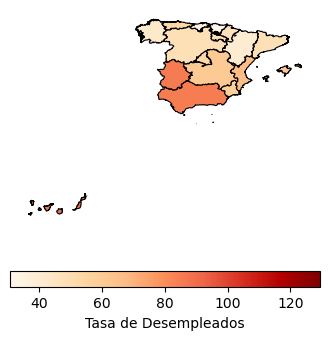

In [8]:
#| fig-align: center
#| include: true
#| width: 80%
#| fig-cap: "Tasa de Desempleo por Comunidad Autónoma en España"
# Graficar mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df_final.plot(column="Tasa Desempleo", cmap="OrRd", linewidth=0.8, edgecolor="black",
            legend=True, legend_kwds={'label': "Tasa de Desempleados",
                                      'orientation': "horizontal"}, ax=ax)
ax.axis("off")
plt.show()

In [9]:
# Normalizamos la columna Desempleados (z-score) y min-max
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
df_final["Desempleados_zscore"] = zscore(df_final["Desempleados"])
df_final["Desempleados_minmax"] = MinMaxScaler().fit_transform(df_final[["Desempleados"]])

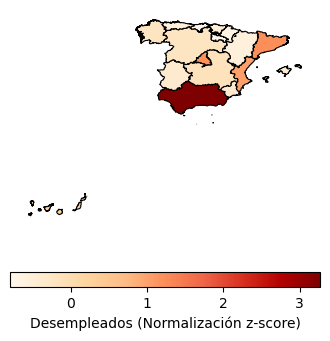

In [10]:
#| fig-align: center
#| fig-cap: "Desempleados por Comunidad Autónoma en España (Normalización z-score)"
#| width: 80%
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df_final.plot(column="Desempleados_zscore", cmap="OrRd", linewidth=0.8, edgecolor="black",
            legend=True, legend_kwds={'label': "Desempleados (Normalización z-score)",
                                      'orientation': "horizontal"}, ax=ax)

ax.axis("off")  # Ocultar ejes

# Mostrar mapa
plt.show()

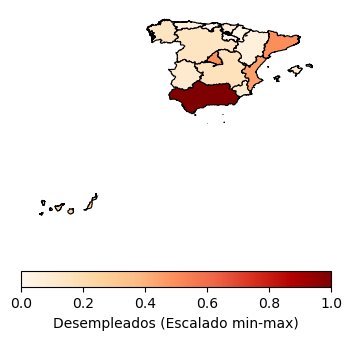

In [11]:
#| fig-align: center
#| fig-cap: "Desempleados por Comunidad Autónoma en España (Escalado min-max)"
#| width: 80%
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df_final.plot(column="Desempleados_minmax", cmap="OrRd", linewidth=0.8, edgecolor="black",
            legend=True, legend_kwds={'label': "Desempleados (Escalado min-max)",
                                      'orientation': "horizontal"}, ax=ax)

ax.axis("off")  # Ocultar ejes

# Mostrar mapa
plt.show()

## Actividad 3: Comparación de las visualizaciones

-  ¿Qué diferencias se observan antes y después de la normalización?

    Se observa claramente como se realiza una visualización mucho más representativa, aquellas comunidades con una población muy grande se puede observar que no están tan afectadas como parecía respecto al dato de desempleo(se ejemplifica claramente con Andalucía y Cataluña), por otro lado, gracias a la normalización podemos observar la cruda realidad que tienen algunas comunidades con poblaciones más pequeñas como Extremadura o las Islas Canarias.

-  ¿Cómo afecta la normalización la percepción de los valores entre regiones?

    Afecta de manera que evita la distorsión de representación del color como canal de codificación del valor cuantitativo de desempleo debido al uso de valores absolutos. El haber regiones muy dispares en el tamaño de su población provoca un sesgo importante que se consigue reducir gracias a la normalización por población.


- ¿Qué método de normalización crees que es más adecuado para estos datos?

    Obviamente el método más adecuado de normalización sería el de por población por la propia naturaleza de los datos que estamos tratando.

## Actividad 4: Representación de los Datos en un Mapa de Símbolos

**Ventajas respecto al mapa de coropletas:**

Comparación Directa: Permite comparar fácilmente los valores entre diferentes regiones mediante el tamaño de los símbolos, lo que facilita la interpretación cuantitativa.

Menos Sensible a la Proporción de Área: No se ve afectado por el tamaño físico de las áreas, lo que permite una representación más precisa de los datos en regiones con diferentes tamaños.

**Inconvenientes respecto al mapa de coropletas:**

Superposición de Símbolos: En áreas densamente pobladas, los símbolos pueden superponerse, dificultando la visualización y la interpretación de los datos.

Pérdida de Contexto Geográfico: Puede ser menos efectivo para mostrar el contexto geográfico y las relaciones espaciales, ya que se centra en el tamaño de los símbolos en lugar de en los límites de las regiones.

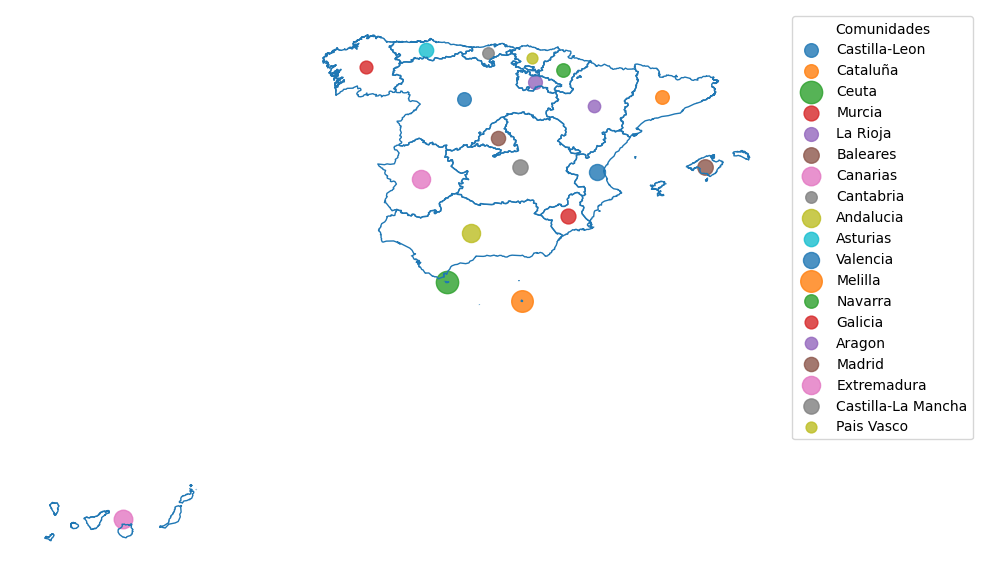

In [12]:
#| fig-align: center
#| fig-cap: "Mapa de Símbolos: Tasa de Desempleo por Comunidad Autónoma en España"
#| width: 80%
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar las geometrías de las comunidades
df_final.boundary.plot(ax=ax, linewidth=1)

# Extraer la columna de Tasa Desempleo para el tamaño de los círculos
tasas_desempleo = df_final['Tasa Desempleo'] * 2 # Multiplicar por un factor para que los círculos sean visibles

# Añadir círculos para cada comunidad
for x, y, td, comunidad in zip(df_final.geometry.centroid.x, 
                                  df_final.geometry.centroid.y, 
                                  tasas_desempleo, 
                                  df_final['Comunidad']):
    ax.scatter(x, y, s=td, alpha=0.8, label=comunidad)

# Ajustes finales del gráfico
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Comunidades')
plt.axis('off')  # Opcional: quitar ejes
plt.show()